# Dispersion analysis for acoustic and elastic wave equations for various spatial finite-difference operators

"Symbol" of exact spatial operators:

$$\hat{\partial}_{x}=ik_x, \quad \hat{\partial}_{xx}=\hat{\partial}_{x}\hat{\partial}_{x}=-k^2_x$$
$$\hat{\partial}_{z}=ik_z, \quad \hat{\partial}_{zz}=\hat{\partial}_{z}\hat{\partial}_{z}=-k^2_z$$
$$\hat{\partial}_{x}\hat{\partial}_{z}=-k_xk_z$$

### Symbol of fourth order FD operators

$$\hat{D}_1 = \frac{1}{h}\big[4i/3\sin(kh)-i/6\sin(2kh)\big]$$
$$\hat{D}_2^{wide} = \widehat{\hat{D}_1D_1}= -\frac{1}{h^2}\big[65/72-2/9\cos(kh)-8/9\cos(2kh)+2/9\cos(3kh)-1/72\cos(4kh)\big]$$
$$\hat{D}_2^{narrow} = -\frac{1}{h^2}\big[5/2-8/3\cos(kh)+1/6\cos(2kh)\big]$$

In [1]:
!mkdir -p ../fig

In [2]:
import numpy as np
import math

eps=0.01
n=100
pi=math.pi
kh=np.linspace(eps,pi-eps,n)
D1=4.0/3*np.sin(kh)-1.0/6*np.sin(2*kh)
D2_wide=-(65.0/72-2.0/9*np.cos(kh)-8.0/9*np.cos(2*kh)+2.0/9*np.cos(3*kh)-1.0/72*np.cos(4*kh))
D2_narrow=-(5.0/2-8.0/3*np.cos(kh)+1.0/6*np.cos(2*kh))

### Dispersion for the acoustic wave equation:
Dispersion equation: $$\omega^2 = c^2|\mathbf{k}|^2$$
Numerical phase velocity error: $$\frac{v_{num}}{c}=\sqrt{\frac{\hat{D}_{xx}+\hat{D}_{zz}}{\hat{\partial}_{xx}+\hat{\partial}_{zz}}}$$

In [3]:
def error_acoustic(Dxx,Dzz,kh):
    n=kh.shape[0]
    error=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            error[i,j] = math.sqrt(-(Dxx[j]+Dzz[i])/(kh[j]**2+kh[i]**2))
    return error

In [4]:
# Dispersion error for narrow or wide stencils
error_wide=error_acoustic(D2_wide,D2_wide,kh)
error_narrow=error_acoustic(D2_narrow,D2_narrow,kh)

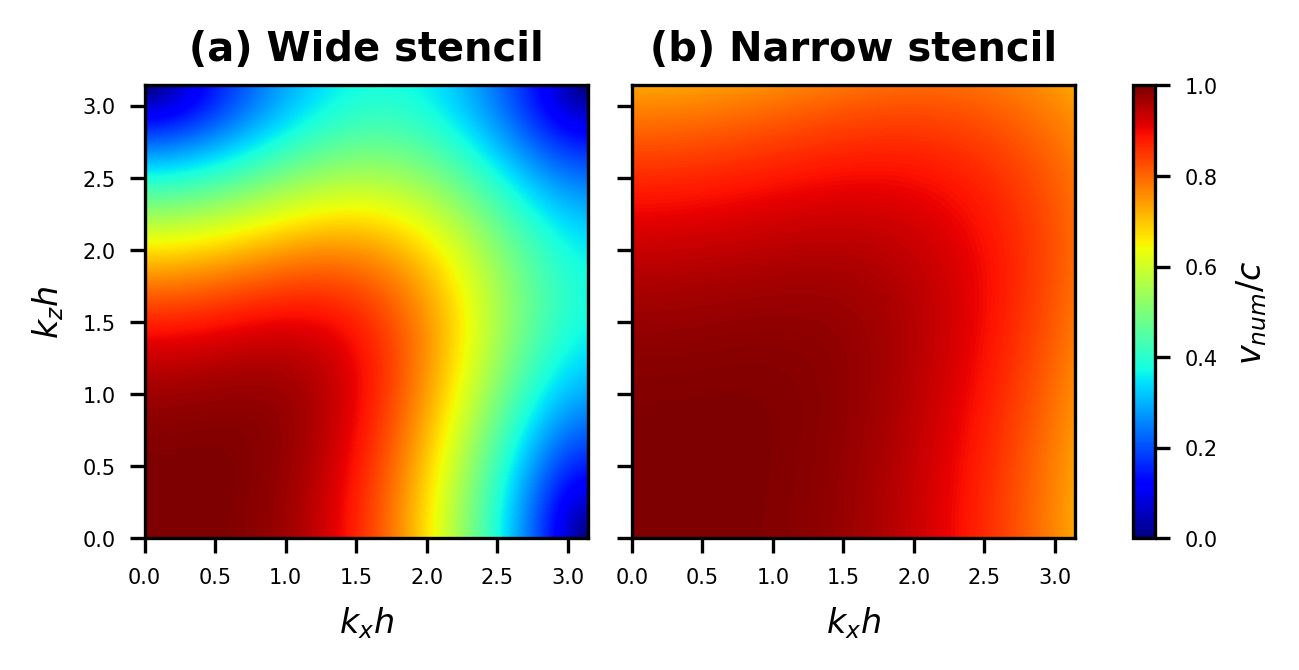

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots(1,2,figsize=(5, 2),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
im1=ax[0].imshow(error_wide,interpolation='bilinear',aspect="auto",extent=[0,pi,pi,0],vmin=0,vmax=1,cmap='jet')
im2=ax[1].imshow(error_narrow,interpolation='bilinear',aspect="auto",extent=[0,pi,pi,0],vmin=0,vmax=1,cmap='jet')
ax[0].set(xlabel=r'$k_xh$')
ax[1].set(xlabel=r'$k_xh$')
ax[0].set(ylabel=r'$k_zh$')
ax[1].set_yticklabels([])
ax[0].set_title('(a) Wide stencil',fontweight='bold',loc='center')
ax[1].set_title('(b) Narrow stencil',fontweight='bold',loc='center')
ax[0].tick_params(axis='both', which='major', labelsize=5)
ax[1].tick_params(axis='both', which='major', labelsize=5)
cbar=fig.colorbar(im1, ax=ax.ravel().tolist(),format='%.'+str(1)+'f',aspect=20)
cbar.ax.tick_params(labelsize=5)
cbar.set_label(label=r'$v_{num}/c$',size=8,weight='bold')
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

### Dispersion for the 2D elastic isotropic wave equation:
Dispersion equation: $$\det(A)=0$$

$$A=\begin{bmatrix}
\rho\omega^2+\lambda\partial_{xx}+2\mu\partial_{xx}+\mu\partial_{zz} & (\lambda+\mu)\partial_{x}\partial_{z} \\
(\lambda+\mu)\partial_{x}\partial_{z} & \rho\omega^2+\lambda\partial_{zz}+2\mu\partial_{zz}+\mu\partial_{xx}
\end{bmatrix}$$

which yields
$$\omega^4-\omega^2|\mathbf{k}|^2(v_p^2+v_s^2)+v_p^2v_s^2|\mathbf{k}|^4=0$$

and admits two solutions:
$$\omega_p^2=v_p^2|\mathbf{k}|^2 \quad \omega_s^2=v_s^2|\mathbf{k}|^2$$

The full dispersion equation for the discretized system:
$$\begin{split}
0&=\omega^4 + \omega^2\big[ (v_p^2-2v_s^2)(\hat{D}_{xx}^l+\hat{D}_{zz}^l)+3v_s^2(\hat{D}_{xx}^m+\hat{D}_{zz}^m) \big]\\
&+v_p^4(\hat{D}_{xx}^l\hat{D}_{zz}^l-\hat{D}_{x}\hat{D}_{x}\hat{D}_{z}\hat{D}_{z}) \\
&+v_s^4\big[ 4(\hat{D}_{xx}^l-\hat{D}_{xx}^m)(\hat{D}_{zz}^l-\hat{D}_{zz}^m) +2\hat{D}_{xx}^m(\hat{D}_{xx}^m-\hat{D}_{xx}^l)+2\hat{D}_{zz}^m(\hat{D}_{zz}^m-\hat{D}_{zz}^l)+\hat{D}_{xx}^m\hat{D}_{zz}^m- \hat{D}_{x}\hat{D}_{x}\hat{D}_{z}\hat{D}_{z}\big] \\
&+v_p^2v_s^2\big[ \hat{D}_{xx}^l\hat{D}_{xx}^m + \hat{D}_{zz}^l\hat{D}_{zz}^m +2\hat{D}_{x}\hat{D}_{x}\hat{D}_{z}\hat{D}_{z} +2\hat{D}_{xx}^l(\hat{D}_{zz}^m-\hat{D}_{zz}^l) + 2\hat{D}_{zz}^l(\hat{D}_{xx}^m-\hat{D}_{xx}^l) \big]
\end{split}$$

where $l,m \in \{wide,narrow\}$.

In [6]:
def error_elastic(Dxxl,Dzzl,Dxxm,Dzzm,Dx,Dz,kh,vp,vs,ps):
    n=kh.shape[0]
    error=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            a = 1.0
            b = (vp**2-2*vs**2)*(Dxxl[j]+Dzzl[i])+3*vs**2*(Dxxm[j]+Dzzm[i])
            c = vp**4*(Dxxl[j]*Dzzl[i]-Dx[j]**2*Dz[i]**2) \
            +vs**4*(4*(Dxxl[j]-Dxxm[j])*(Dzzl[i]-Dzzm[i])+2*Dxxm[j]*(Dxxm[j]-Dxxl[j])+2*Dzzm[i]*(Dzzm[i]-Dzzl[i])+Dxxm[j]*Dzzm[i]-Dx[j]**2*Dz[i]**2) \
            +(vp*vs)**2*(Dxxl[j]*Dxxm[j]+Dzzl[i]*Dzzm[i]+2*Dx[j]**2*Dz[i]**2+2*Dxxl[j]*(Dzzm[i]-Dzzl[i])+2*Dzzl[i]*(Dxxm[j]-Dxxl[j]))
            delta=b**2-4*a*c
            error[i,j] = 0.5*(-b+ps*math.sqrt(delta)+(ps-1)*math.sqrt(delta))/((ps*vp**2+(1-ps)*vs**2)*(kh[j]**2+kh[i]**2))
            error[i,j] = math.sqrt(error[i,j])
    return error

In [7]:
# Dispersion error for narrow, wide or mixed stencils for a given vp/vs ratio
ratio=10
vp=1.0
vs=vp/ratio
error_wide_p=error_elastic(D2_wide,D2_wide,D2_wide,D2_wide,D1,D1,kh,vp,vs,1)
error_wide_s=error_elastic(D2_wide,D2_wide,D2_wide,D2_wide,D1,D1,kh,vp,vs,0)
error_narrow_p=error_elastic(D2_narrow,D2_narrow,D2_narrow,D2_narrow,D1,D1,kh,vp,vs,1)
error_narrow_s=error_elastic(D2_narrow,D2_narrow,D2_narrow,D2_narrow,D1,D1,kh,vp,vs,0)
error_mixed_p=error_elastic(D2_wide,D2_wide,D2_narrow,D2_narrow,D1,D1,kh,vp,vs,1)
error_mixed_s=error_elastic(D2_wide,D2_wide,D2_narrow,D2_narrow,D1,D1,kh,vp,vs,0)

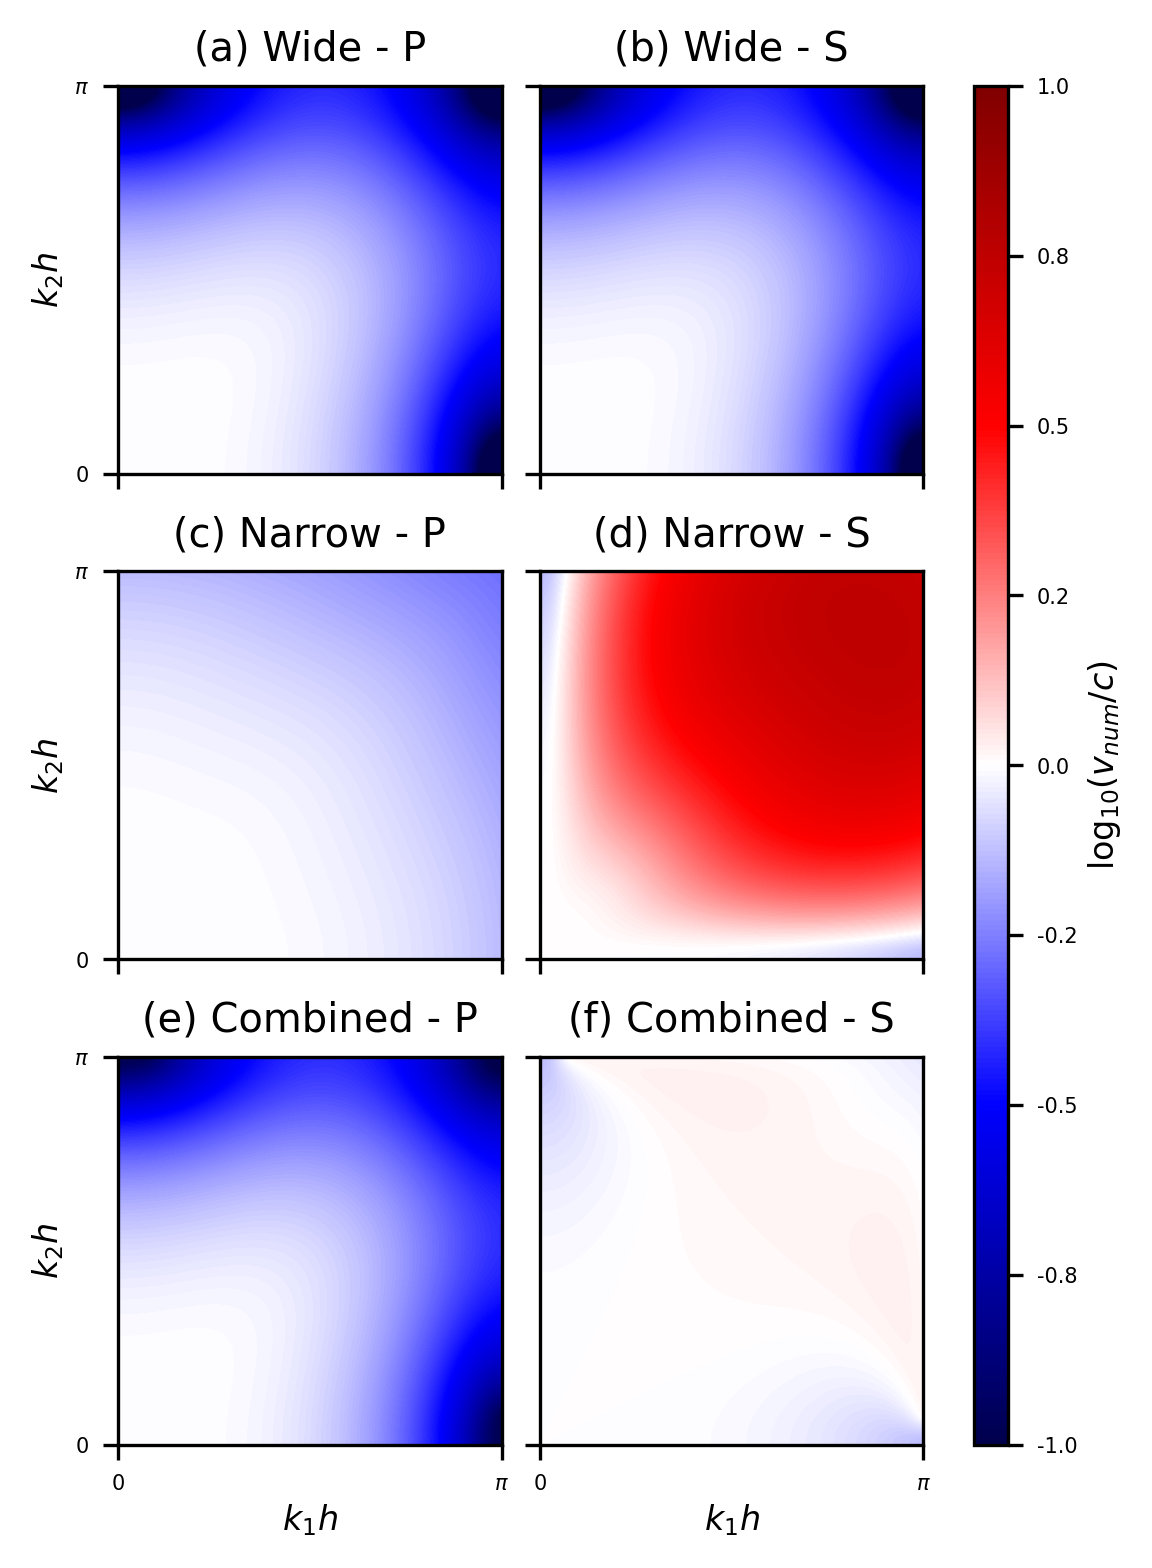

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['axes.labelpad'] = 2.0

vmin=-1
vmax=1

fig, ax = plt.subplots(3,2,figsize=(4.33, 6.0),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
im1=ax[0,0].imshow(np.log10(error_wide_p),interpolation='bilinear',aspect="auto",extent=[0,pi,pi,0],vmin=vmin,vmax=vmax,cmap='seismic')
im2=ax[0,1].imshow(np.log10(error_wide_s),interpolation='bilinear',aspect="auto",extent=[0,pi,pi,0],vmin=vmin,vmax=vmax,cmap='seismic')
im3=ax[1,0].imshow(np.log10(error_narrow_p),interpolation='bilinear',aspect="auto",extent=[0,pi,pi,0],vmin=vmin,vmax=vmax,cmap='seismic')
im4=ax[1,1].imshow(np.log10(error_narrow_s),interpolation='bilinear',aspect="auto",extent=[0,pi,pi,0],vmin=vmin,vmax=vmax,cmap='seismic')
im5=ax[2,0].imshow(np.log10(error_mixed_p),interpolation='bilinear',aspect="auto",extent=[0,pi,pi,0],vmin=vmin,vmax=vmax,cmap='seismic')
im6=ax[2,1].imshow(np.log10(error_mixed_s),interpolation='bilinear',aspect="auto",extent=[0,pi,pi,0],vmin=vmin,vmax=vmax,cmap='seismic')
ax[2,0].set_xlabel(r'$k_1h$')
ax[2,1].set_xlabel(r'$k_1h$')
ax[0,0].set_ylabel(r'$k_2h$')
ax[1,0].set_ylabel(r'$k_2h$')
ax[2,0].set_ylabel(r'$k_2h$')

ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[1,0].set_xticklabels([])
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[2,1].set_yticklabels([])
for i in range(3):
    for j in range(2):
        ax[i,j].set_xticks([0,math.pi])
        ax[i,j].set_yticks([0,math.pi])
        ax[i,j].tick_params(axis='both', which='major', labelsize=5)
        ax[i,j].invert_yaxis()

ax[0,0].set_yticklabels(['0',r'$\pi$'])
ax[1,0].set_yticklabels(['0',r'$\pi$'])
ax[2,0].set_yticklabels(['0',r'$\pi$'])
ax[2,0].set_xticklabels(['0',r'$\pi$'])
ax[2,1].set_xticklabels(['0',r'$\pi$'])

ax[0,0].set_title('(a) Wide - P',loc='center')
ax[0,1].set_title('(b) Wide - S',loc='center')
ax[1,0].set_title('(c) Narrow - P',loc='center')
ax[1,1].set_title('(d) Narrow - S',loc='center')
ax[2,0].set_title('(e) Combined - P',loc='center')
ax[2,1].set_title('(f) Combined - S',loc='center')

cbar=fig.colorbar(im1, ax=ax.ravel().tolist(),format='%.'+str(1)+'f',aspect=40)
cbar.ax.tick_params(labelsize=5)
cbar.set_label(label=r'$\log_{10}(v_{num}/c)$',size=8,weight='bold')

#plt.show()
plt.savefig('../fig/dispersion.png',bbox_inches='tight',format='png')